In [1]:
import os
import pandas as pd
from dateutil.relativedelta import relativedelta
import matplotlib.pyplot as plt

os.chdir(os.path.dirname(os.path.abspath(__file__)))

# データの読み込み
use_log = pd.read_csv("input/use_log.csv")
print(len(use_log))
use_log.head()

197428


,log_id,customer_id,usedate
0,L00000049012330,AS009373,2018-04-01
1,L00000049012331,AS015315,2018-04-01
2,L00000049012332,AS040841,2018-04-01
3,L00000049012333,AS046594,2018-04-01
4,L00000049012334,AS073285,2018-04-01


In [2]:
customer_master = pd.read_csv("input/customer_master.csv")
print(len(customer_master))
customer_master.head()

4192


,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaN,CA1,0


In [3]:
class_master = pd.read_csv("input/class_master.csv")
print(len(class_master))
class_master.head()

3


,class,class_name,price
0,C01,オールタイム,10500
1,C02,デイタイム,7500
2,C03,ナイト,6000


In [4]:
campaign_master = pd.read_csv("input/campaign_master.csv")
print(len(campaign_master))
campaign_master.head()

3


,campaign_id,campaign_name
0,CA1,通常
1,CA2,入会費半額
2,CA3,入会費無料


In [5]:
# 顧客データにクラスマスターデータとキャンペーンマスターデータを結合する
# 1.クラスマスターデータを結合する
join_customer_data = pd.merge(customer_master, class_master, how="left", on="class")
print(len(join_customer_data))
join_customer_data.head()

4192


,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,オールタイム,10500
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,オールタイム,10500
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,オールタイム,10500
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,オールタイム,10500
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaN,CA1,0,ナイト,6000


In [6]:
# 2.キャンペーンマスターデータを結合する
join_customer_data = pd.merge(
    join_customer_data, campaign_master, how="left", on="campaign_id"
)
print(len(join_customer_data))
join_customer_data.head()

4192


,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,オールタイム,10500,通常
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,オールタイム,10500,通常
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,オールタイム,10500,通常
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,オールタイム,10500,通常
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaN,CA1,0,ナイト,6000,通常


In [7]:
# 3.欠損値がないかを確認する
join_customer_data.isnull().sum()

customer_id         0
name                0
class               0
gender              0
start_date          0
end_date         2842
campaign_id         0
is_deleted          0
class_name          0
price               0
campaign_name       0
dtype: int64

In [8]:
# 顧客データの基礎集計をする
# 1.会員区分毎の顧客数を確認する
join_customer_data.groupby("class_name")["customer_id"].count()

class_name
オールタイム    2045
デイタイム     1019
ナイト       1128
Name: customer_id, dtype: int64

In [9]:
# 2.キャンペーン区分毎の顧客数を確認する
join_customer_data.groupby("campaign_name")["customer_id"].count()

campaign_name
入会費半額     650
入会費無料     492
通常       3050
Name: customer_id, dtype: int64

In [10]:
# 3.性別毎の顧客数を確認する
join_customer_data.groupby("gender")["customer_id"].count()

gender
F    1983
M    2209
Name: customer_id, dtype: int64

In [11]:
# 4.退会済みの顧客数を確認する
join_customer_data.groupby("is_deleted")["customer_id"].count()

is_deleted
0    2842
1    1350
Name: customer_id, dtype: int64

In [12]:
# 5.2018年度に入会した顧客数を確認する
# 5-1.start_dateをdatetime型に変換する
join_customer_data["start_date"] = pd.to_datetime(join_customer_data["start_date"])
join_customer_data.dtypes

customer_id              object
name                     object
class                    object
gender                   object
start_date       datetime64[ns]
end_date                 object
campaign_id              object
is_deleted                int64
class_name               object
price                     int64
campaign_name            object
dtype: object

In [13]:
# 5-2.2018年度に入会した顧客数をカウントする
join_customer_data.loc[
    ("2018-04-01" <= join_customer_data["start_date"])
    & (join_customer_data["start_date"] <= "2019-03-31"),
    "customer_id",
].count()

1376

In [14]:
# 最新月に在籍している顧客データの基礎集計をする
# 1.最新月に月末まで在籍している（end_dateが2019-03-31以降またはend_dateのデータがない）顧客のデータを選択する
# 1-1.end_dateをdatetime型に変換する
join_customer_data["end_date"] = pd.to_datetime(join_customer_data["end_date"])
join_customer_data.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,オールタイム,10500,通常
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,オールタイム,10500,通常
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0,オールタイム,10500,通常
3,HD024127,XXXXX,C01,F,2015-05-01,NaT,CA1,0,オールタイム,10500,通常
4,HD661448,XXXXX,C03,F,2015-05-01,NaT,CA1,0,ナイト,6000,通常


In [15]:
# 1-2.最新月に在籍している顧客のデータを選択する
customers_exist_latest_month = join_customer_data.loc[
    (join_customer_data["end_date"] >= "2019-03-31")
    | (join_customer_data["end_date"].isnull())
]
print(len(customers_exist_latest_month))
customers_exist_latest_month

2953


,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,オールタイム,10500,通常
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,オールタイム,10500,通常
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0,オールタイム,10500,通常
3,HD024127,XXXXX,C01,F,2015-05-01,NaT,CA1,0,オールタイム,10500,通常
4,HD661448,XXXXX,C03,F,2015-05-01,NaT,CA1,0,ナイト,6000,通常
...,...,...,...,...,...,...,...,...,...,...,...
4187,HD676663,XXXX,C01,M,2019-03-14,NaT,CA1,0,オールタイム,10500,通常
4188,HD246549,XXXXX,C01,F,2019-03-14,NaT,CA1,0,オールタイム,10500,通常
4189,GD037007,XXXXX,C03,M,2019-03-14,NaT,CA1,0,ナイト,6000,通常
4190,OA953150,XXXXX,C01,M,2019-03-14,NaT,CA1,0,オールタイム,10500,通常


In [16]:
# 1-3.絞り込みの検証を行う（end_dateが2019-03-31とNaTのみかを確認する）
customers_exist_latest_month["end_date"].unique()

<DatetimeArray>
['NaT', '2019-03-31 00:00:00']
Length: 2, dtype: datetime64[ns]

In [17]:
# 2.基礎集計をする
# 2-1.会員区分毎の顧客数を確認する
customers_exist_latest_month.groupby("class_name")["customer_id"].count()

class_name
オールタイム    1444
デイタイム      696
ナイト        813
Name: customer_id, dtype: int64

In [18]:
# 2-2.キャンペーン区分毎の顧客数を確認する
customers_exist_latest_month.groupby("campaign_name")["customer_id"].count()

campaign_name
入会費半額     311
入会費無料     242
通常       2400
Name: customer_id, dtype: int64

In [19]:
# 2-3.性別毎の顧客数を確認する
customers_exist_latest_month.groupby("gender")["customer_id"].count()

gender
F    1400
M    1553
Name: customer_id, dtype: int64

In [20]:
# 顧客毎の月利用回数の集計データを作成する
# 1.集計に必要なデータを作成する
# 1-1.usedateをdatetime型に変換する
use_log["usedate"] = pd.to_datetime(use_log["usedate"])

# 1-2.use_month列を作成する
use_log["use_month"] = use_log["usedate"].dt.strftime("%Y-%m")

# 1-3.各顧客の月毎の利用回数を集計したデータフレームを作成する
monthly_use_log = use_log.groupby(["use_month", "customer_id"], as_index=False).count()
monthly_use_log

,use_month,customer_id,log_id,usedate
0,2018-04,AS002855,4,4
1,2018-04,AS009013,2,2
2,2018-04,AS009373,3,3
3,2018-04,AS015315,6,6
4,2018-04,AS015739,7,7
...,...,...,...,...
36837,2019-03,TS995853,8,8
36838,2019-03,TS998593,8,8
36839,2019-03,TS999079,3,3
36840,2019-03,TS999231,6,6


In [21]:
# 1-4.不要なusedate列を削除する（usedate列とlog_id列のカウント結果は等しいため）
monthly_use_log.drop("usedate", axis=1, inplace=True)
monthly_use_log

,use_month,customer_id,log_id
0,2018-04,AS002855,4
1,2018-04,AS009013,2
2,2018-04,AS009373,3
3,2018-04,AS015315,6
4,2018-04,AS015739,7
...,...,...,...
36837,2019-03,TS995853,8
36838,2019-03,TS998593,8
36839,2019-03,TS999079,3
36840,2019-03,TS999231,6


In [22]:
# 1-5.列名log_idをcountに変更する
monthly_use_log.rename(columns={"log_id": "count"}, inplace=True)
monthly_use_log

,use_month,customer_id,count
0,2018-04,AS002855,4
1,2018-04,AS009013,2
2,2018-04,AS009373,3
3,2018-04,AS015315,6
4,2018-04,AS015739,7
...,...,...,...
36837,2019-03,TS995853,8
36838,2019-03,TS998593,8
36839,2019-03,TS999079,3
36840,2019-03,TS999231,6


In [23]:
# 2.顧客毎の月利用回数の平均値、中央値、最大値、最小値を集計する
customer_monthly_use_log = (
    monthly_use_log[["customer_id", "count"]]
    .groupby("customer_id")
    .agg(["mean", "median", "max", "min"])
)["count"]
customer_monthly_use_log.reset_index(drop=False, inplace=True)
customer_monthly_use_log

,customer_id,mean,median,max,min
0,AS002855,4.500000,5.0,7,2
1,AS008805,4.000000,4.0,8,1
2,AS009013,2.000000,2.0,2,2
3,AS009373,5.083333,5.0,7,3
4,AS015233,7.545455,7.0,11,4
...,...,...,...,...,...
4187,TS995853,9.500000,9.5,11,8
4188,TS998593,8.142857,8.0,9,7
4189,TS999079,4.916667,5.5,9,2
4190,TS999231,4.666667,5.0,8,1


In [24]:
# 各顧客が定期的（今回は、毎週同じ曜日に利用していることと定義する）に利用しているかどうかのフラグを作成する
# 1.顧客毎に月毎の曜日別の利用回数をカウントする
# 1-1.曜日データを作成する
use_log["weekday"] = use_log["usedate"].dt.weekday
# 1-2.各月の各曜日の利用回数をカウントする
weekday_use_log = use_log.groupby(
    ["customer_id", "use_month", "weekday"], as_index=False
).count()[["customer_id", "use_month", "weekday", "log_id"]]
weekday_use_log.rename(columns={"log_id": "count"}, inplace=True)
weekday_use_log.head()

,customer_id,use_month,weekday,count
0,AS002855,2018-04,5,4
1,AS002855,2018-05,2,1
2,AS002855,2018-05,5,4
3,AS002855,2018-06,5,5
4,AS002855,2018-07,1,1


In [25]:
# 2.定期利用フラグを作成する
# 2-1.顧客毎に各月の同一曜日の利用回数の最大値を取得する
weekday_use_log = weekday_use_log.groupby("customer_id", as_index=False).max("count")[
    ["customer_id", "count"]
]
weekday_use_log.head()

,customer_id,count
0,AS002855,5
1,AS008805,4
2,AS009013,2
3,AS009373,5
4,AS015233,5


In [26]:
# 2-2.最大値が4以上の時にフラグを立てる
weekday_use_log["routine_flg"] = 0
weekday_use_log.loc[weekday_use_log["count"] >= 4, "routine_flg"] = 1
weekday_use_log.head()

,customer_id,count,routine_flg
0,AS002855,5,1
1,AS008805,4,1
2,AS009013,2,0
3,AS009373,5,1
4,AS015233,5,1


In [27]:
# 顧客データと利用履歴データ(月利用回数の集計データと定期利用フラグ)を結合する
# 1.顧客データと月利用回数の集計データを結合する
join_customer_data = pd.merge(
    join_customer_data, customer_monthly_use_log, how="left", on="customer_id"
)
# 2.顧客データと定期利用フラグを結合する
join_customer_data = pd.merge(
    join_customer_data,
    weekday_use_log[["customer_id", "routine_flg"]],
    how="left",
    on="customer_id",
)
join_customer_data.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min,routine_flg
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,4.833333,5.0,8,2,1
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,5.083333,5.0,7,3,1
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,4.583333,5.0,6,3,1
3,HD024127,XXXXX,C01,F,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,4.833333,4.5,7,2,1
4,HD661448,XXXXX,C03,F,2015-05-01,NaT,CA1,0,ナイト,6000,通常,3.916667,4.0,6,1,1


In [28]:
# 3.欠損値の確認をする
join_customer_data.isnull().sum()

customer_id         0
name                0
class               0
gender              0
start_date          0
end_date         2842
campaign_id         0
is_deleted          0
class_name          0
price               0
campaign_name       0
mean                0
median              0
max                 0
min                 0
routine_flg         0
dtype: int64

In [29]:
# 会員期間を計算する
# 1.会員期間計算用の終了日データ列を作成する
join_customer_data["calc_end_date"] = join_customer_data["end_date"]
join_customer_data["calc_end_date"] = join_customer_data["calc_end_date"].fillna(
    pd.to_datetime("20190430")
)
# 2.会員期間を月単位で算出する
join_customer_data["membership_period"] = 0
for i in range(len(join_customer_data)):
    delta = relativedelta(
        join_customer_data.loc[i, "calc_end_date"],
        join_customer_data.loc[i, "start_date"],
    )
    join_customer_data.loc[i, "membership_period"] = delta.years * 12 + delta.months
join_customer_data.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min,routine_flg,calc_end_date,membership_period
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,4.833333,5.0,8,2,1,2019-04-30,47
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,5.083333,5.0,7,3,1,2019-04-30,47
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,4.583333,5.0,6,3,1,2019-04-30,47
3,HD024127,XXXXX,C01,F,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,4.833333,4.5,7,2,1,2019-04-30,47
4,HD661448,XXXXX,C03,F,2015-05-01,NaT,CA1,0,ナイト,6000,通常,3.916667,4.0,6,1,1,2019-04-30,47


In [30]:
# 顧客行動の各種統計量を計算する
# 1.顧客毎の月利用回数の平均値、中央値、最大値、最小値の統計量を計算する
join_customer_data[["mean", "median", "max", "min"]].describe()

,mean,median,max,min
count,4192.000000,4192.000000,4192.000000,4192.000000
mean,5.333127,5.250596,7.823950,3.041269
std,1.777533,1.874874,2.168959,1.951565
min,1.000000,1.000000,1.000000,1.000000
25%,4.250000,4.000000,7.000000,2.000000
50%,5.000000,5.000000,8.000000,3.000000
75%,6.416667,6.500000,9.000000,4.000000
max,12.000000,12.000000,14.000000,12.000000


In [31]:
# 2.定期利用している(各月の同一曜日の利用回数の最大値が4以上)ユーザーとそうでないユーザーの数の確認
join_customer_data.groupby("routine_flg").count()["customer_id"]

routine_flg
0     779
1    3413
Name: customer_id, dtype: int64

(array([857., 774., 395., 368., 311., 331., 323., 237., 288., 308.]),
 array([ 1. ,  5.6, 10.2, 14.8, 19.4, 24. , 28.6, 33.2, 37.8, 42.4, 47. ]),
 <BarContainer object of 10 artists>)

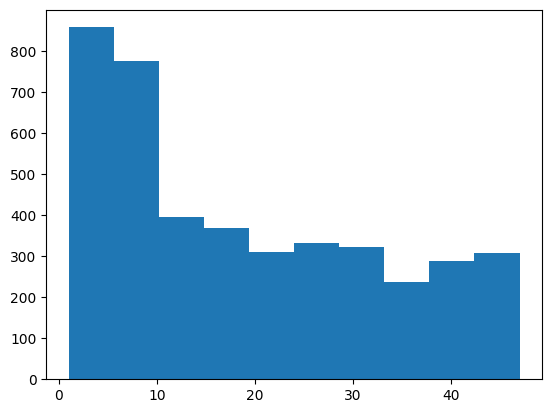

In [32]:
# 3.会員期間の分布を可視化する
fig = plt.figure()
ax = fig.add_subplot()

ax.hist(join_customer_data["membership_period"])

In [33]:
# 退会ユーザーと継続ユーザーの違いを把握する
# 1.退会ユーザーの統計量の計算
join_customer_data[join_customer_data["is_deleted"] == 1].describe()[
    [
        "is_deleted",
        "price",
        "mean",
        "median",
        "max",
        "min",
        "routine_flg",
        "membership_period",
    ]
]

,is_deleted,price,mean,median,max,min,routine_flg,membership_period
count,1350.0,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000
mean,1.0,8595.555556,3.865474,3.621852,6.461481,1.821481,0.456296,8.026667
min,1.0,6000.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,1.0,6000.000000,3.000000,3.000000,4.000000,1.000000,0.000000,4.000000
50%,1.0,7500.000000,4.000000,4.000000,7.000000,2.000000,0.000000,7.000000
75%,1.0,10500.000000,4.666667,4.500000,8.000000,2.000000,1.000000,11.000000
max,1.0,10500.000000,9.000000,9.000000,13.000000,8.000000,1.000000,23.000000
std,0.0,1949.163652,1.246385,1.270847,2.584021,0.976361,0.498271,5.033692


In [34]:
# 2.継続ユーザーの統計量の計算
join_customer_data[join_customer_data["is_deleted"] == 0].describe()[
    [
        "is_deleted",
        "price",
        "mean",
        "median",
        "max",
        "min",
        "routine_flg",
        "membership_period",
    ]
]

,is_deleted,price,mean,median,max,min,routine_flg,membership_period
count,2842.0,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000
mean,0.0,8542.927516,6.030288,6.024279,8.471147,3.620690,0.984166,23.970443
min,0.0,6000.000000,3.166667,3.000000,5.000000,1.000000,0.000000,1.000000
25%,0.0,6000.000000,4.833333,5.000000,7.000000,2.000000,1.000000,12.000000
50%,0.0,7500.000000,5.583333,5.500000,8.000000,3.000000,1.000000,24.000000
75%,0.0,10500.000000,7.178030,7.000000,10.000000,5.000000,1.000000,35.000000
max,0.0,10500.000000,12.000000,12.000000,14.000000,12.000000,1.000000,47.000000
std,0.0,1977.189779,1.553587,1.599765,1.571048,2.030488,0.124855,13.746761


In [35]:
# 3.データダンプ
# 3-1.outputディレクトリの存在を確認し、存在しなければ作成する
if not os.path.exists("output"):
    # ディレクトリが存在しない場合、ディレクトリを作成する
    os.makedirs("output")

# 3-2.join_customer_dataをcsvファイルとして出力する
join_customer_data.to_csv("output/join_customer_data.csv", index=False)